<a href="https://colab.research.google.com/github/Aabhiinavvv/CIFAR-10-Object-Recognition/blob/main/cifar_10_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c cifar-10

 91% 652M/715M [00:11<00:01, 53.8MB/s]
100% 715M/715M [00:11<00:00, 66.3MB/s]


In [4]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [5]:
from zipfile import ZipFile
dataset = "/content/cifar-10.zip"

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("The Dataset Is Extracted")

The Dataset Is Extracted


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!ls

cifar-10.zip  kaggle.json  sampleSubmission.csv  train.7z
drive	      sample_data  test.7z		 trainLabels.csv


In [8]:
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.3/71.3 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.2/494.2 kB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.6/100.6 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.3/144.3 kB 12.9 MB/s eta 0:00:00


In [9]:
import py7zr
archieve = py7zr.SevenZipFile('/content/train.7z')
archieve.extractall()
archieve.close()


In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mping
import seaborn as sns
from sklearn.model_selection import train_test_split

In [11]:
filenames = os.listdir("/content/train")


In [12]:
type(filenames)

list

In [13]:
print(filenames[0:5])

['23285.png', '24198.png', '18842.png', '31451.png', '35215.png']


In [14]:
labels_df = pd.read_csv("/content/trainLabels.csv")

In [15]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [16]:
labels_df.shape

(50000, 2)

In [17]:
labels_df[labels_df['id']==7796]

,id,label
7795,7796,frog


In [18]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [19]:
labels_df['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [20]:
labels_dict ={'airplane':0,'automobile':1,'bird':2,'cat':3,'deer':4,'dog':5,'frog':6,'horse':7,'ship':8,'truck':9}

In [21]:
labels = [labels_dict[i] for i in labels_df['label']]

In [22]:
print(labels[0:5])

[6, 9, 9, 4, 1]


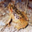

In [23]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread("/content/train/7796.png")
cv2_imshow(img)

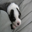

In [24]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread("/content/train/45888.png")
cv2_imshow(img)

In [25]:
labels_df[labels_df['id']==45888]

,id,label
45887,45888,dog


In [26]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [27]:
id_list = list(labels_df['id'])

In [28]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


In [29]:
from PIL import Image
import numpy as np

train_data_folder = '/content/train/'

data = []
for id in id_list:
    image = Image.open(train_data_folder + str(id) + '.png')
    image = np.array(image)
    data.append(image)


In [30]:
type(data)

list

In [31]:
len(data)

50000

In [32]:
data[0].shape

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
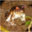

In [33]:
data[0]

In [34]:
X = np.array(data)
Y = np.array(labels)

In [35]:
X_train,X_test,Y_train,Y_test = train_test_split (X,Y,test_size=0.2,random_state=2)

In [36]:
print(X.shape,X_train.shape,X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [37]:
X_train_scaled =X_train/255
Y_test_scaled = X_test/255

In [38]:
X_train_scaled

array([[[[0.81960784, 0.82352941, 0.79607843],
         [0.83529412, 0.83921569, 0.81960784],
         [0.85490196, 0.85882353, 0.84313725],
         ...,
         [0.49803922, 0.29019608, 0.15294118],
         [0.47843137, 0.26666667, 0.1372549 ],
         [0.45490196, 0.24705882, 0.1254902 ]],

        [[0.82352941, 0.82352941, 0.79215686],
         [0.83529412, 0.83921569, 0.81176471],
         [0.85490196, 0.8627451 , 0.83921569],
         ...,
         [0.48627451, 0.2745098 , 0.1372549 ],
         [0.4745098 , 0.2627451 , 0.12941176],
         [0.48235294, 0.27058824, 0.14117647]],

        [[0.80784314, 0.80392157, 0.76470588],
         [0.81960784, 0.81960784, 0.79215686],
         [0.83529412, 0.84313725, 0.81960784],
         ...,
         [0.48627451, 0.2745098 , 0.14509804],
         [0.51372549, 0.30196078, 0.16470588],
         [0.51372549, 0.30588235, 0.16078431]],

        ...,

        [[0.49803922, 0.42352941, 0.38039216],
         [0.54117647, 0.47843137, 0.43137255]

In [39]:
import tensorflow as tf
from tensorflow import keras

In [41]:
nums_of_classes = 10
model= keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(nums_of_classes,activation='softmax')

])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [43]:
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics=['acc'])

In [44]:
model.fit(X_train_scaled,Y_train,epochs=10)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - acc: 0.2580 - loss: 2.0472
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.3471 - loss: 1.8323
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.3635 - loss: 1.7908
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - acc: 0.3810 - loss: 1.7494
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - acc: 0.3899 - loss: 1.7189
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - acc: 0.3934 - loss: 1.7013
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.3993 - loss: 1.6860
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - acc: 0.4029 - loss: 1.6807
Epoch 9/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.4104 - loss: 1.6558
Epoch 10/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.4159 - loss: 1.6405


In [49]:
from tensorflow.keras import Sequential,models,layers
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [51]:
convolutional_base = ResNet50(weights='imagenet',include_top =  False,input_shape=(256,256,3))
convolutional_base.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [53]:
num_of_classes =10
model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes,activation='relu'))


In [56]:
model.compile(
    optimizer=optimizers.RMSprop(learning_rate=2e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


